<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Teste%20de%20Hip%C3%B3teses/teste%20de%20hip%C3%B3tese%20-%20aplica%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv

Este conjunto de dados contém leituras de pressão arterial antes e depois de uma <b>intervenção</b>. Estas são as variáveis ​​“bp_before” e “bp_after”.

In [25]:
bp_reading = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv')

In [26]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
12,13,Male,30-45,165,135
20,21,Male,46-59,149,168
85,86,Female,46-59,154,146
13,14,Male,30-45,145,159
40,41,Male,60+,157,167
57,58,Male,60+,154,147
10,11,Male,30-45,149,164
51,52,Male,60+,175,160
107,108,Female,60+,151,158
104,105,Female,60+,162,138


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


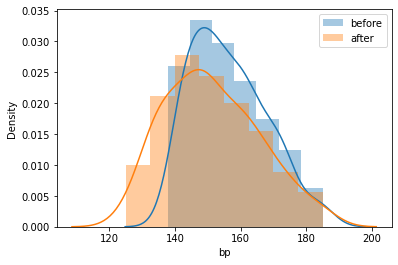

In [27]:
import seaborn as sns
sns.distplot(bp_reading.bp_before, label='before')
sns.distplot(bp_reading.bp_after, label='after')
plt.xlabel('bp')
plt.legend()

In [28]:
bp_reading.shape

(120, 5)

In [29]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


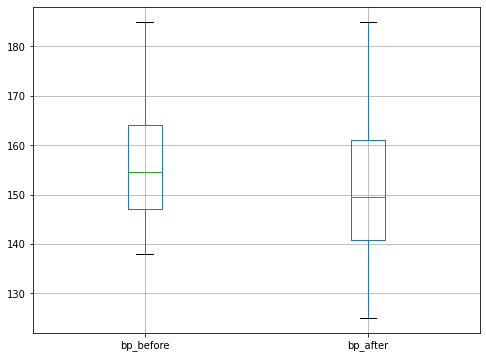

In [30]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(8, 6))

## Hipótese sendo testada

<b>Hipótese Nula (H0):</b> u1 = u2, que representa que a média de `sample_01` é igual a média de `sample 02`

<b>Hipótese Alternativa (H1):</b> u1 != u2, a média de `sample01` não é igual à média de `sample 02`

## Verificação de suposição

* As amostras são sorteadas de forma independente e aleatória
* A distribuição dos resíduos entre os dois grupos deve seguir a distribuição normal
* As variâncias entre os dois grupos são iguais

In [31]:
# levene --> teste de variância: H0 variâncias iguais
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [32]:
from sklearn.preprocessing import scale

In [33]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])

In [34]:
bp_reading[['bp_diff']]

,bp_diff
0,0.906743
1,0.726496
2,1.207155
3,-0.354987
4,0.005508
...,...
115,0.305919
116,-0.234822
117,0.846661
118,0.426084


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


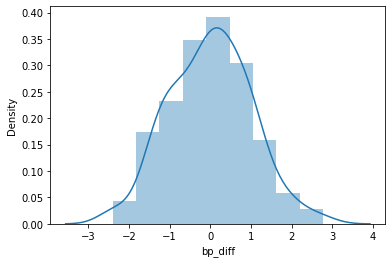

In [35]:
import seaborn as sns
sns.distplot(bp_reading['bp_diff'])

### Verificando a distribuição normal - Q-Q
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

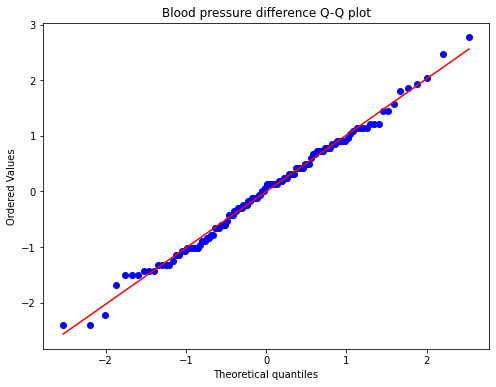

In [36]:
plt.figure(figsize=(8, 6))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

### `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [37]:
# H0: vem de uma normal
stats.shapiro(bp_reading['bp_diff'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

In [38]:
# H0: bp_reading['bp_after'] == bp_reading['bp_before']


stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

Como p-value < 0.05 (0.001), isso significa que eu posso rejeitar a hipótese nula de que bp_reading['bp_after'] == bp_reading['bp_before']

In [39]:
stats.ttest_1samp(bp_reading['bp_after'] - bp_reading['bp_before'], 0)

Ttest_1sampResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [40]:
bp_reading['bp_after'].mean()

151.35833333333332

In [41]:
bp_reading['bp_after'].std()

14.177622226198423

In [42]:
stats.ttest_1samp(bp_reading['bp_after'], 148.8)

Ttest_1sampResult(statistic=1.9767163406211996, pvalue=0.050386469026410606)

# t test - t statistic

H0: A >= B<br>
H1: A <  B

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


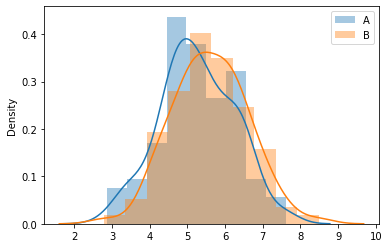

In [55]:
from scipy.stats import ttest_ind, ttest_1samp

A = np.random.normal(5.5, 1, size=100)
B = np.random.normal(5.6, 1, size=100)

sns.distplot(A, label='A')
sns.distplot(B, label='B')
plt.legend()

In [56]:
stats.ttest_rel(A, B)

Ttest_relResult(statistic=-2.505828012801328, pvalue=0.013846815638952821)

In [ ]:
st, p_two_tailed = ttest_rel(A, B)

In [ ]:
# H0: A == 30 (nao é igual a 30)
# H1: A < 30

The null hypothesis is rejected. We can reject the hypothesis that A and B have the same mean.
pvalue == 0.03900300568813467
The mean of A is greater than the mean of B


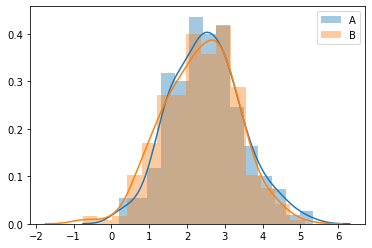

In [ ]:
# Dividir por 2 o p-value da two-tailed
# Sinal da estatística T se refere à direção da hipótese alternativa (ou seja, se A>B ou A<B)

from scipy.stats import ttest_ind, ttest_1samp

A = np.random.normal(2.5, 1, size=300)
B = np.random.normal(2.3, 1, size=300)

sns.distplot(A)
sns.distplot(B)
plt.legend(['A','B'])

st, p_two_tailed = stats.ttest_rel(A, B)

# B.mean() - A.mean() 
p_one_tailed = p_two_tailed / 2


if p_one_tailed < 0.05:
    print('The null hypothesis is rejected. We can reject the hypothesis that A and B have the same mean.')
    print(f'pvalue == {p_one_tailed}')
    if st < 0:
        print('The mean of A is less than the mean of B')
    else:
        print('The mean of A is greater than the mean of B')    
else:
    print('The null hypothesis can`t be rejected')
    print(f'pvalue == {p_one_tailed}')